In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)
! pwd

atomickitty.aws
compthink
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)
/home/compthink/CECE-1330-PsuedoCourse/1-Lessons/Lesson11/PsuedoLesson


In [2]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

# ENGR 1330 Computational Thinking with Data Science 
Last GitHub Commit Date: 25 February 2021

## Lesson 10 Data Modeling: Randomness and Probability 

This lesson introduces probability as the chance of occurance of some event. 
Concepts of sampling and empirical distributions are introduced.

## Objectives
- To be able to find probabilities of enumerable (discrete) events.
- To be able to approximate probabilities of enumerable and/or continuous events.
  - Explain the concepts of sample, population, and probabilities
  - Computing probability: single events, both events, at least event.


---

## Computational Thinking Concepts
The CT concepts include:

- Decomposition => Reduce complex observations into concept of an event
- Abstraction => Outcome == an event, and its likelihood
- Pattern Matching => Fliping coins, rolling die == map to an event space; apply gambling principles
- System Integration => Iteration, Simulation 





---
## Randomness and Probabilities

The textbook discusses randomness at: https://www.inferentialthinking.com/chapters/09/Randomness.html

Section 9.5 of that link elaborates on probabilities

"Over the centuries, there has been considerable philosophical debate about what probabilities are. Some people think that probabilities are relative frequencies; others think they are long run relative frequencies; still others think that probabilities are a subjective measure of their own personal degree of uncertainty."

As a practical matter, most probabilities are relative frequencies.  If you are a Bayesian statistician, its just conditioned relative frequency.  By convention, probabilities are numbers between 0 and 1, or, equivalently, 0% and 100%. Impossible events have probability 0. Events that are certain have probability 1.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRY93kpa8YEikMTZsMZk8Rka4DTQrpxkDxmkA&usqp=CAU)

As a silly example, the probability that a Great White shark will swim up your sewer pipe and bite you on the bottom, is zero.  Unless the sewer pipe is pretty big, the shark cannot physically get to you - hence impossible.  Now if you are swimming in a freshwater river, lets say the Columbia river on the Oregon border, that probability of sharkbite increases a bit, perhaps 1 in 100 million, or 0.000001% chance of a Great White shark (a pelagic species adapted to salt water), swimming upriver in freshwater, past a couple of fish ladders, still hungry enough bite your bottom. It would be a rare bite indeed; but not physically impossible.


![](https://www.myyosemitepark.com/.image/t_share/MTQ3OTg4NjE5NjM3MTcxNjc5/yt-galen-clark-overhanging-rock_georgefiske1900.jpg)

At the other end of the scale, "sure things" have a probability close to 1. If you run and jump off Glacier point in Yosemite Valley, its almost guarenteed that you will have a 1000 foot plunge until you hit the apron of the cliff and make a big red smear - there could be a gust of wind pushing you away into the trees, but pretty unlikely. So without a squirrel suit and a parachute you are pretty much going to expire with probability 100% chance.

Math is the main tool for finding probabilities exactly, though computers are useful for this purpose too. Simulation can provide excellent approximations. In this section, we will informally develop a few simple rules that govern the calculation of probabilities. In subsequent sections we will return to simulations to approximate probabilities of complex events.

We will use the standard notation 𝑃(event) to denote the probability that "event" happens, and we will use the words "chance" and "probability" interchangeably.

----

## Simple Exclusion 

If the chance that event happens is 40%, then the chance that it doesn't happen is 60%. 
This natural calculation can be described in general as follows:

𝑃(an event doesn't happen) = 1−𝑃(the event happens)

The result is correct if the entireity of possibilities are enumerated, that is the entire population is described.

## Complete Enumeration

If you are rolling an ordinary die, a natural assumption is that all six faces are equally likely. 
Then probabilities of how one roll comes out can be easily calculated as a ratio. 
For example, the chance that the die shows an even number is 

$$\frac{number~of~even~faces}{number~of~all~faces} =  \frac{\#{2,4,6}}{\#{1,2,3,4,5,6}} = \frac{3}{6} $$

Similarly,
$$𝑃(die~shows~a~multiple~of~3) = \frac{\#{3,6}}{\#{1,2,3,4,5,6}} = \frac{2}{6}$$

In general,
$$𝑃(an event happens) = \frac{outcomes that make the event happen}{all outcomes}$$

Provided all the outcomes are equally likely.  As above, this presumes the entireity of possibilities are enumerated.  

In the case of a single die, there are six outcomes - these comprise the entire **population** of outcomes.  If we roll two die there are 12 outcomes, three die 18 and so on.  

Not all random phenomena are as simple as one roll of a die. The two main rules of probability, developed below, allow mathematicians to find probabilities even in complex situations.

## Conditioning (Two events must happen)

Suppose you have a box that contains three tickets: one red, one blue, and one green. Suppose you draw two tickets at random without replacement; that is, you shuffle the three tickets, draw one, shuffle the remaining two, and draw another from those two. What is the chance you get the green ticket first, followed by the red one?

There are six possible pairs of colors: RB, BR, RG, GR, BG, GB (we've abbreviated the names of each color to just its first letter). All of these are equally likely by the sampling scheme, and only one of them (GR) makes the event happen. So
$$ 𝑃(green~first,~then~red) = \frac{GR}{RB, BR, RG, GR, BG, GB} = \frac{1}{6} $$

But there is another way of arriving at the answer, by thinking about the event in two stages. First, the green ticket has to be drawn. That has chance 1/3, which means that the green ticket is drawn first in about 1/3 of all repetitions of the experiment. 

But that doesn't complete the event. Among the 1/3 of repetitions when green is drawn first, the red ticket has to be drawn next. 
That happens in about 1/2 of those repetitions, and so:

$$𝑃(green~first,~then~red) = \frac{1}{2} of \frac{1}{3} = \frac{1}{6} $$

This calculation is usually written "in chronological order," as follows.

$$𝑃(green~first,~then~red) = \frac{1}{3} of \frac{1}{2} = \frac{1}{6} $$

The factor of $$\frac{1}{2}$$ is called " the **conditional** chance that the red ticket appears second, given that the green ticket appeared first."

In general, we have the multiplication rule:

$$ 𝑃(two~events~both~happen) = 𝑃(one~event~happens)\times 𝑃(the~other~event~happens, given~that~the~first~one~happened) $$

Thus, when there are two conditions – one event must happen, as well as another – the chance is a fraction of a fraction, which is smaller than either of the two component fractions. The more conditions that have to be satisfied, the less likely they are to all be satisfied.

## Partitioning (When sequence doesn't matter) - A kind of enumeration!

Suppose instead we want the chance that one of the two tickets is green and the other red. 
This event doesn't specify the order in which the colors must appear. 
So they can appear in either order.

A good way to tackle problems like this is to partition the event so that it can happen in exactly one of several different ways. 
The natural partition of "one green and one red" is: GR, RG.

Each of GR and RG has chance 1/6 by the calculation above. 

So you can calculate the chance of "one green and one red" by adding them up.
 
$$𝑃(one~green~and~one~red) = 𝑃(GR)+𝑃(RG) = \frac{1}{6} + \frac{1}{6} = \frac{2}{6} $$

In general, we have the addition rule:

$$ 𝑃(an~event~happens) = 𝑃(first~way~it~can~happen)+𝑃(second~way~it~can~happen) $$

provided the event happens in exactly one of the two ways.

Thus, when an event can happen in one of two different ways, the chance that it happens is a sum of chances, and hence bigger than the chance of either of the individual ways.

The multiplication rule has a natural extension to more than two events, as we will see below. So also the addition rule has a natural extension to events that can happen in one of several different ways.

Learn more at: https://ocw.mit.edu/courses/mathematics/18-440-probability-and-random-variables-spring-2014/lecture-notes/MIT18_440S14_Lecture3.pdf

## At Least One Success (A kind of exclusion/partition)
Data scientists work with random samples from populations. 
A question that sometimes arises is about the likelihood that a particular individual in the population is selected to be in the sample. 
To work out the chance, that individual is called a "success," and the problem is to find the chance that the sample contains a success.

To see how such chances might be calculated, we start with a simpler setting: tossing a coin two times.

If you toss a coin twice, there are four equally likely outcomes: HH, HT, TH, and TT. 
We have abbreviated "Heads" to H and "Tails" to T. 
The chance of getting at least one head in two tosses is therefore 3/4.

Another way of coming up with this answer is to work out what happens if you don't get at least one head: both the tosses have to land tails. So
$$𝑃(at~least~one~head~in~two~tosses) = 1−𝑃(both~tails) = 1−\frac{1}{4} = \frac{3}{4}$$

Notice also that
$$𝑃(both~tails) = \frac{1}{4} = \frac{1}{2} \times \frac{1}{2} = (\frac{1}{2})^2$$

by the multiplication rule.

These two observations allow us to find the chance of at least one head in any given number of tosses. For example,
$$𝑃(at~least~one~head~in~17~tosses) = 1−𝑃(all~17~are~tails) = 1−(\frac{1}{2})^{17}$$

And now we are in a position to find the chance that the face with six spots comes up at least once in rolls of a die.

For example,
$$𝑃(a~single~roll~is~not~6) = 𝑃(1)+𝑃(2)+𝑃(3)+𝑃(4)+𝑃(5) = \frac{5}{6}$$

Therefore,
$$𝑃(at~least~one~6~in~two~rolls) = 1−𝑃(both~rolls~are~not~6) = 1−(\frac{5}{6})^2$$

and
$$𝑃(at~least~one~6~in~17~rolls) = 1−(\frac{5}{6})^{17}$$

The table below shows these probabilities as the number of rolls increases from 1 to 50.

<AxesSubplot:xlabel='NumRolls', ylabel='Prob at least one 6'>

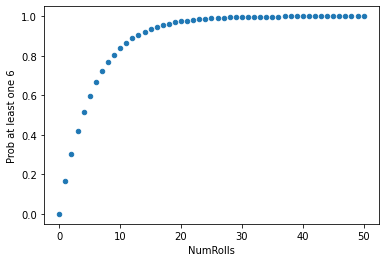

In [47]:
import pandas as pd
HowManyRollsToTake = 50
numRolls = []
probabilities = []
for i in range(HowManyRollsToTake+1):
    numRolls.append(i)
    probabilities.append(1-(5/6)**i)

rolls = {
    "NumRolls": numRolls,
    "Prob at least one 6": probabilities
}

df = pd.DataFrame(rolls)
df.plot.scatter(x="NumRolls", y="Prob at least one 6")

## Why Should anyone buy Flood Protection?

Lets apply these ideas to insurance.

![](https://www.snopes.com/uploads/2015/05/tropical-storm-allison-865x452.jpg)

Suppose you have a house that is located in the 100-year ARI (Annual Recurrance Interval) regulatory flood plain; and you are in a community with a good engineer, who got the probability correct, that is the chance in any year of a **total loss** is 1 in 100 or 0.01. Thus the chance of **no loss** in any year is 99 in 100 or 0.99 (pretty good odds)! 

So what is the chance during a 30-year loan, of no loss?

We can just apply the multiplication rule on the **no loss** probability 
 $$ P(No~Loss) = 0.99^{30} $$

But lets simulate - literally adapting the prior script.

<AxesSubplot:xlabel='Years from Start of Loan'>

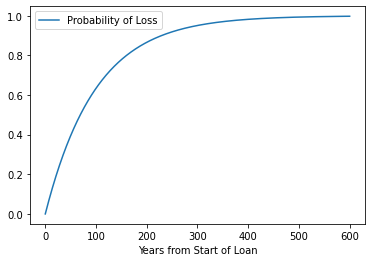

In [59]:
import pandas as pd
HowManyYears = 600
numYears = []
nolossprobabilities = []
lossprobabilities = []
for i in range(HowManyYears+1):
    numYears.append(i) # How many years in the sequence
    nolossprobabilities.append((1-(1/100))**i) #Probability of No Loss after i-years
    lossprobabilities.append(1 - (1-(1/100))**i) #Probability of Loss after i-years
years = {
    "Years from Start of Loan": numYears,
    "Probability of No Loss": nolossprobabilities,
    "Probability of Loss": lossprobabilities
}

df = pd.DataFrame(years)
df.plot.line(x="Years from Start of Loan", y="Probability of Loss")
# df.plot.line(x="Years from Start of Loan", y="Probability of No Loss")

In [57]:
df.head()

,Years from Start of Loan,Probability of No Loss,Probability of Loss
0,0,1.000000,0.000000
1,1,0.990000,0.010000
2,2,0.980100,0.019900
3,3,0.970299,0.029701
4,4,0.960596,0.039404


In [60]:
df["Probability of Loss"].loc[30]

0.2602996266117198